# Extract video features using pliers
it works with the pliers conda env at the moment

In [2]:
from pliers.extractors import FarnebackOpticalFlowExtractor
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from pliers.stimuli import VideoStim

ModuleNotFoundError: No module named 'pliers'

In [2]:
#method to find the index of nearest value in an array
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx,array[idx]

In [3]:
stimulus = '../sourcedata/data/HBN/stimuli/hbn_stimuli/TP.mp4'
outdir = '../sourcedata/data/HBN/features/'
stim = os.path.splitext( os.path.split(stimulus)[1] )[0] # split stim name eg 'TP'

### Extract Optical Flow

In [7]:
vs = VideoStim(stimulus)
ext = FarnebackOpticalFlowExtractor()
results = ext.transform(vs)

optic_flow = results.to_df(object_id='auto')

optic_flow.to_pickle(f"{outdir}{stim}_optic_flow.pkl")

#plt.plot(TP_optic_flow.total_flow)

flow = np.array(optic_flow.total_flow.tolist())
onset = np.array(optic_flow.onset.tolist())

flow_10hz = np.zeros(2032)

# downsample from 24hz to 10hz with 1d max pooling essentially. We take the max because we don't want to miss a spike/peak
previous_ind=0
for i,f in enumerate(flow_10hz):
    t=i/10
    nearest_ind,nearest_val = find_nearest(onset, t)
    flow_bin = np.append( flow[previous_ind:nearest_ind]  , 0 )
    flow_10hz[i] = max(flow_bin)
    previous_ind = nearest_ind

np.save(f"{outdir}{stim}_optic_flow_10hz.npy",flow_10hz)

#flow_10hz = np.load('../sourcedata/data/HBN/features/TP_optic_flow_10hz.npy')

#export it as a tsv to visualize
onset_tsv = np.arange(0,203.2,0.1)
duration_tsv = np.ones(2032)-0.9
d = {"onset": onset_tsv, "duration": duration_tsv, "value": flow_10hz}
df = pd.DataFrame(d)
df.to_csv(f"{outdir}{stim}_optic_flow_10hz.tsv", sep='\t', index=False)

### extract brightness

In [24]:
from pliers.extractors import BrightnessExtractor

vs = VideoStim(stimulus)
ext = BrightnessExtractor()
results = ext.transform(vs)

results_list=[]
for r in results:
    results_list.append( r.to_df()['brightness'][0] )
flow=np.asanyarray(results_list)


onset_list=[]
for r in results:
    onset_list.append( r.to_df()['onset'][0] )
onset=np.asanyarray(onset_list)
flow_10hz = np.zeros(2032)

# downsample from 24hz to 10hz with 1d max pooling essentially. We take the max because we don't want to miss a spike/peak
previous_ind=0
for i,f in enumerate(flow_10hz):
    t=i/10
    nearest_ind,nearest_val = find_nearest(onset, t)
    flow_bin = np.append( flow[previous_ind:nearest_ind]  , 0 )
    flow_10hz[i] = max(flow_bin)
    previous_ind = nearest_ind

np.save(f"{outdir}{stim}_brightness_10hz.npy",flow_10hz)

#flow_10hz = np.load('../sourcedata/data/HBN/features/TP_optic_flow_10hz.npy')

#export it as a tsv to visualize
onset_tsv = np.arange(0,203.2,0.1)
duration_tsv = np.ones(2032)-0.9
d = {"onset": onset_tsv, "duration": duration_tsv, "value": flow_10hz}
df = pd.DataFrame(d)
df.to_csv(f"{outdir}{stim}_brightness_10hz.tsv", sep='\t', index=False)

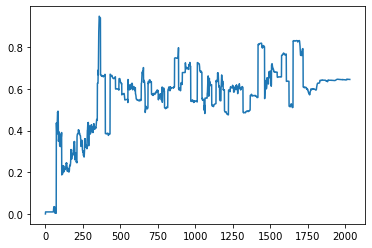

In [25]:
plt.plot(flow_10hz)

In [33]:
from pliers.extractors import SaliencyExtractor



vs = VideoStim(stimulus)
ext = SaliencyExtractor()
results = ext.transform(vs)

len(results)

results_list=[]
for r in results:
    results_list.append( r.to_df()['max_saliency'][0] )
flow=np.asanyarray(results_list)


onset_list=[]
for r in results:
    onset_list.append( r.to_df()['onset'][0] )
onset=np.asanyarray(onset_list)
flow_10hz = np.zeros(2032)

# downsample from 24hz to 10hz with 1d max pooling essentially. We take the max because we don't want to miss a spike/peak
previous_ind=0
for i,f in enumerate(flow_10hz):
    t=i/10
    nearest_ind,nearest_val = find_nearest(onset, t)
    flow_bin = np.append( flow[previous_ind:nearest_ind]  , 0 )
    flow_10hz[i] = max(flow_bin)
    previous_ind = nearest_ind

np.save(f"{outdir}{stim}_max_saliency_10hz.npy",flow_10hz)

#flow_10hz = np.load('../sourcedata/data/HBN/features/TP_optic_flow_10hz.npy')

#export it as a tsv to visualize
onset_tsv = np.arange(0,203.2,0.1)
duration_tsv = np.ones(2032)-0.9
d = {"onset": onset_tsv, "duration": duration_tsv, "value": flow_10hz}
df = pd.DataFrame(d)
df.to_csv(f"{outdir}{stim}_max_saliency_10hz.tsv", sep='\t', index=False)

len(results)

results_list=[]
for r in results:
    results_list.append( r.to_df()['frac_high_saliency'][0] )
flow=np.asanyarray(results_list)


onset_list=[]
for r in results:
    onset_list.append( r.to_df()['onset'][0] )
onset=np.asanyarray(onset_list)
flow_10hz = np.zeros(2032)

# downsample from 24hz to 10hz with 1d max pooling essentially. We take the max because we don't want to miss a spike/peak
previous_ind=0
for i,f in enumerate(flow_10hz):
    t=i/10
    nearest_ind,nearest_val = find_nearest(onset, t)
    flow_bin = np.append( flow[previous_ind:nearest_ind]  , 0 )
    flow_10hz[i] = max(flow_bin)
    previous_ind = nearest_ind

np.save(f"{outdir}{stim}_frac_high_saliency_10hz.npy",flow_10hz)

#flow_10hz = np.load('../sourcedata/data/HBN/features/TP_optic_flow_10hz.npy')

#export it as a tsv to visualize
onset_tsv = np.arange(0,203.2,0.1)
duration_tsv = np.ones(2032)-0.9
d = {"onset": onset_tsv, "duration": duration_tsv, "value": flow_10hz}
df = pd.DataFrame(d)
df.to_csv(f"{outdir}{stim}_frac_high_saliency_10hz.tsv", sep='\t', index=False)

In [36]:
from pliers.extractors import VibranceExtractor
 

In [37]:

vs = VideoStim(stimulus)
ext = VibranceExtractor()
results = ext.transform(vs)

Stim: 4876it [05:23, 15.09it/s]


In [41]:
len(results)

results_list=[]
for r in results:
    results_list.append( r.to_df()['vibrance'][0] )
flow=np.asanyarray(results_list)


onset_list=[]
for r in results:
    onset_list.append( r.to_df()['onset'][0] )
onset=np.asanyarray(onset_list)
flow_10hz = np.zeros(2032)

# downsample from 24hz to 10hz with 1d max pooling essentially. We take the max because we don't want to miss a spike/peak
previous_ind=0
for i,f in enumerate(flow_10hz):
    t=i/10
    nearest_ind,nearest_val = find_nearest(onset, t)
    flow_bin = np.append( flow[previous_ind:nearest_ind]  , 0 )
    flow_10hz[i] = max(flow_bin)
    previous_ind = nearest_ind

np.save(f"{outdir}{stim}_vibrance_10hz.npy",flow_10hz)

#flow_10hz = np.load('../sourcedata/data/HBN/features/TP_optic_flow_10hz.npy')

#export it as a tsv to visualize
onset_tsv = np.arange(0,203.2,0.1)
duration_tsv = np.ones(2032)-0.9
d = {"onset": onset_tsv, "duration": duration_tsv, "value": flow_10hz}
df = pd.DataFrame(d)
df.to_csv(f"{outdir}{stim}_vibrance_10hz.tsv", sep='\t', index=False)